In [39]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from urllib.parse import urljoin
import time
from functools import wraps
import asyncio
import aiohttp
from collections import defaultdict
import io
import h5py


In [2]:
def get_year_urls(base_url):
    """
    Fetches the HTML content from the base_url, parses it to find links 
    that match a 4-digit year pattern, and returns the full URLs.

    Args:
        base_url (str): The URL of the NOAA directory listing.

    Returns:
        list: A list of full URLs for each year subdirectory.
    """
    try:
        # Fetch the content of the page
        response = requests.get(base_url)
        response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all anchor tags (<a>) which contain links
        links = soup.find_all('a', href=True)

        href_list = []
        for link in links:
            href = link['href']
            href_list.append(href)

        return href_list

    except requests.exceptions.RequestException as e:
        print(f"Error fetching the URL: {e}")
        return []
    
def timeit(func):
    """
    A decorator to measure the execution time of a function.
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        execution_time = end_time - start_time

        print(f"'{func.__name__}' executed in {execution_time:.4f} seconds")
        return result
    return wrapper

@timeit
def download_csv(year, csv_url):
    csv_path = os.path.join(URL, str(year), csv_url)
    print(csv_path)
    try:
        return pd.read_csv(csv_path)
    except:
        print('error')

In [3]:
stations = pd.read_csv('https://www.ncei.noaa.gov/pub/data/noaa/isd-history.csv')

In [4]:
stations

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
0,007018,99999,WXPOD 7018,NaN,NaN,NaN,0.000,0.000,7018.0,20110309,20130730
1,007026,99999,WXPOD 7026,AF,NaN,NaN,0.000,0.000,7026.0,20120713,20170822
2,007070,99999,WXPOD 7070,AF,NaN,NaN,0.000,0.000,7070.0,20140923,20150926
3,008260,99999,WXPOD8270,NaN,NaN,NaN,0.000,0.000,0.0,20050101,20120731
4,008268,99999,WXPOD8278,AF,NaN,NaN,32.950,65.567,1156.7,20100519,20120323
...,...,...,...,...,...,...,...,...,...,...,...
29656,A07355,241,VIROQUA MUNICIPAL AIRPORT,US,WI,KY51,43.579,-90.913,394.1,20140731,20250825
29657,A07357,182,ELBOW LAKE MUNICIPAL PRIDE OF THE PRAIRIE AIRPORT,US,MN,KY63,45.986,-95.992,367.3,20140731,20250825
29658,A07359,240,IONIA COUNTY AIRPORT,US,MI,KY70,42.938,-85.061,249.0,20140731,20250825
29659,A51255,445,DEMOPOLIS MUNICIPAL AIRPORT,US,AL,KDYA,32.464,-87.954,34.1,20140731,20250826


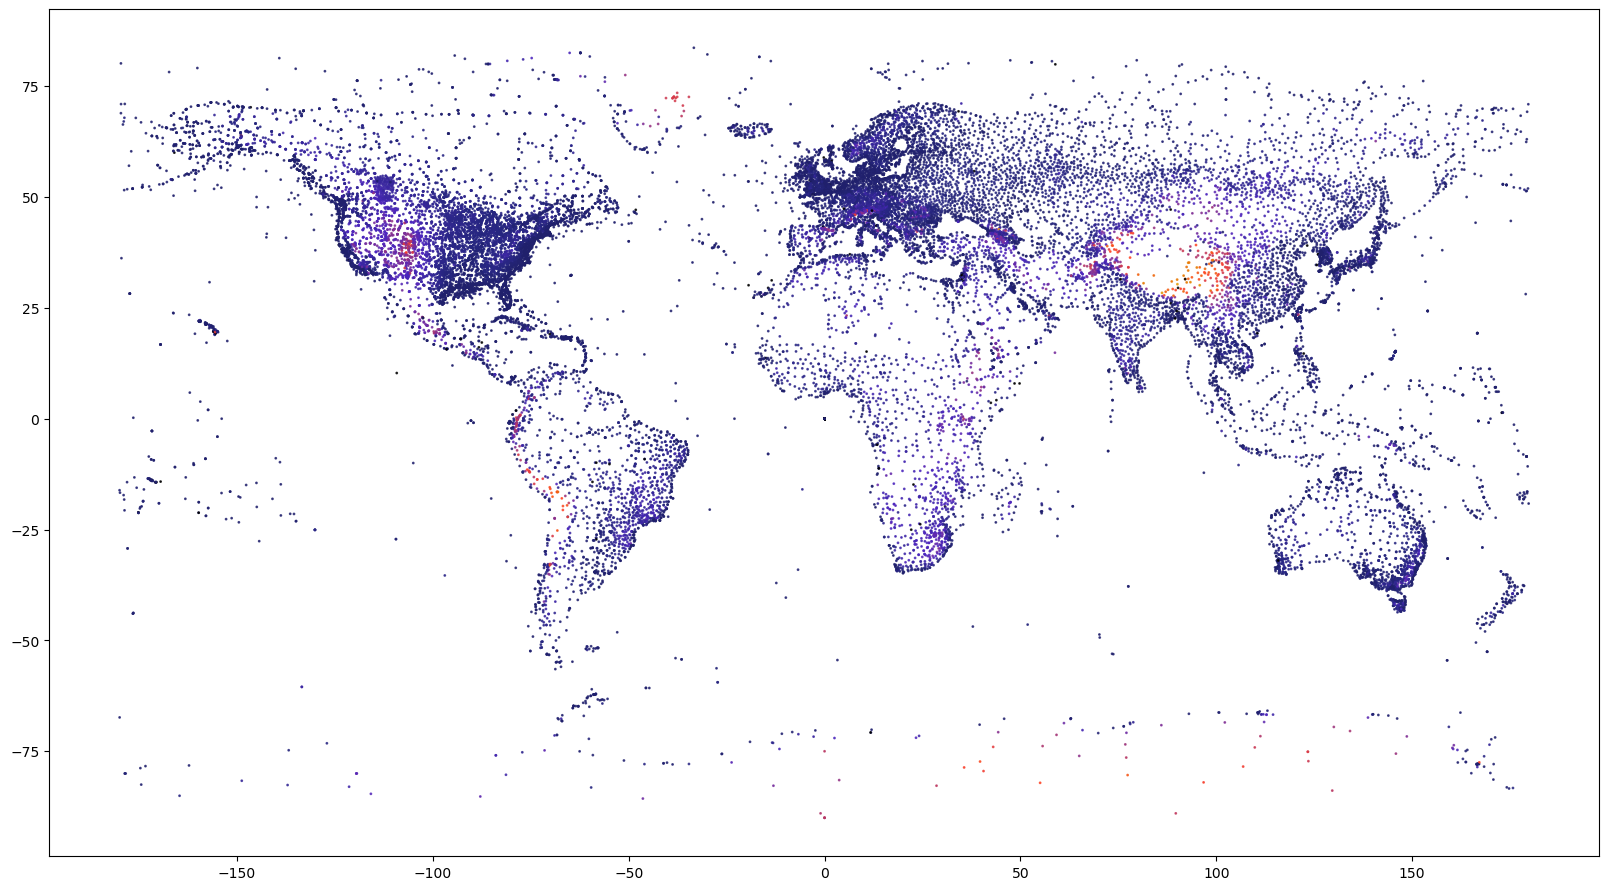

In [82]:
fig = plt.figure(figsize=(20,11))

plt.scatter(stations['LON'],stations['LAT'], c=stations['ELEV(M)'],s=1, cmap='CMRmap', alpha=0.8)

plt.show()

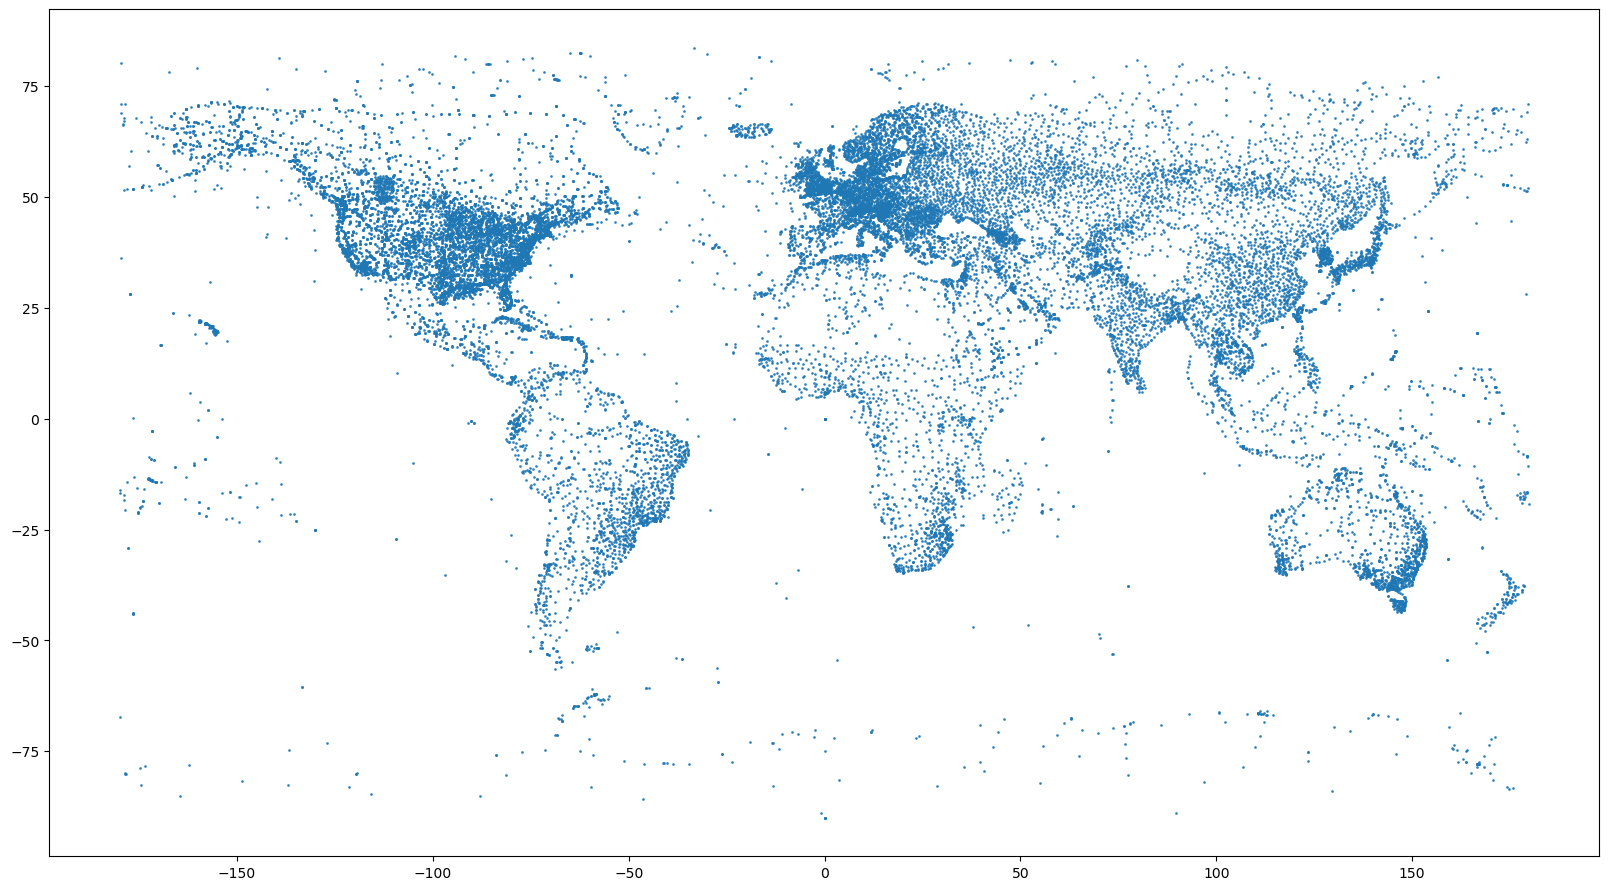

In [79]:
fig = plt.figure(figsize=(20,11))

plt.scatter(stations['LON'],stations['LAT'], s=1, alpha=0.8)

plt.show()

In [9]:

URL = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/access"
'''
stations_dict = {}

for year in range(1929,2026):
    year_urls_list = get_year_urls(os.path.join(URL,str(year)))

    if year_urls_list:
        print(f"Found {len(year_urls_list)} for year {year}.")
        
        stations_dict[year] = year_urls_list

    else:
        print("No year URLs found or an error occurred.")
        
num_files = 0
for key, value in stations_dict.items():
    num_files += len(value)
'''

'\nstations_dict = {}\n\nfor year in range(1929,2026):\n    year_urls_list = get_year_urls(os.path.join(URL,str(year)))\n\n    if year_urls_list:\n        print(f"Found {len(year_urls_list)} for year {year}.")\n        \n        stations_dict[year] = year_urls_list\n\n    else:\n        print("No year URLs found or an error occurred.")\n        \nnum_files = 0\nfor key, value in stations_dict.items():\n    num_files += len(value)\n'

In [7]:
pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2025/01001099999.csv')

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,1001099999,2025-01-01,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",17.4,8,10.3,8,...,27.2,39.4,24.4,,9.7,,0.05,G,999.9,1000
1,1001099999,2025-01-02,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",12.0,9,6.5,9,...,29.1,48.6,16.9,,8.2,,0.02,G,999.9,0
2,1001099999,2025-01-03,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",20.7,8,15.4,8,...,30.9,43.9,23.9,,15.1,,0.02,G,999.9,1000
3,1001099999,2025-01-04,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",22.1,8,15.8,8,...,24.5,35.4,23.9,,19.8,,0.00,G,999.9,1000
4,1001099999,2025-01-05,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",26.5,8,22.6,8,...,28.9,39.4,30.9,,19.6,,0.00,G,999.9,11000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1001099999,2025-08-20,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",43.9,8,38.5,8,...,25.3,999.9,47.3,,40.8,,0.00,G,999.9,0
232,1001099999,2025-08-21,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",43.7,8,36.0,8,...,23.1,30.5,48.6,,39.0,,0.01,G,999.9,0
233,1001099999,2025-08-22,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",45.5,8,36.8,8,...,9.7,19.4,49.3,,42.1,,0.01,G,999.9,0
234,1001099999,2025-08-23,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",45.9,8,40.7,8,...,11.7,13.6,49.6,,41.9,,0.00,G,999.9,0


In [ ]:
csv_filenames = []

for year, filenames in stations_dict.items():
    year_filenames = pd.DataFrame(stations_dict[year], columns=['filename']).iloc[1:]

    year_filenames['year'] = year

    csv_filenames.append(year_filenames)
    
csv_filenames = pd.concat(csv_filenames)

csv_filenames

In [ ]:
csv_filenames.to_csv('ncei_csv_filenames.csv')

In [10]:
csv_filenames = pd.read_csv('ncei_csv_filenames.csv', index_col=0)

csv_filenames

,filename,year
1,03005099999.csv,1929
2,03075099999.csv,1929
3,03091099999.csv,1929
4,03159099999.csv,1929
5,03262099999.csv,1929
...,...,...
11652,A0735500241.csv,2025
11653,A0735700182.csv,2025
11654,A0735900240.csv,2025
11655,A5125500445.csv,2025


In [24]:
stations_dict = {}

for year, value in csv_filenames.groupby('year'):
    stations_dict[year] = value['filename'].values


In [25]:
stations_dict[2025]

array(['01001099999.csv', '01001499999.csv', '01002099999.csv', ...,
       'A0735900240.csv', 'A5125500445.csv', 'A5125600451.csv'],
      dtype=object)

In [37]:
BASE_URL = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/access"


# Function modified to use aiohttp and be an async coroutine
async def download_csv_async(session, year, station_id_filename):
    """Downloads a single CSV file asynchronously and returns a DataFrame."""
    csv_url = os.path.join(BASE_URL, str(year), station_id_filename)
    
    try:
        
        async with session.get(csv_url) as response:
            response.raise_for_status() 
            content = await response.text()
            # Use io.StringIO to treat the string as a file for pandas
            df = pd.read_csv(io.StringIO(content))
            return df

    except aiohttp.ClientError as e:
        # These will likely print for 2025 data as it doesn't exist
        print(f"Error downloading {station_id_filename} for year {year}: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred for {station_id_filename}: {e}")
        return None

async def get_csvs(year_to_fetch):
    start_time = time.time()
    
    csvs = []

    async with aiohttp.ClientSession() as session:
        # Use a slice that works with the mock dict definition
        stations_to_fetch = stations_dict.get(year_to_fetch, [])[1:] 
        
        tasks = [download_csv_async(session, year_to_fetch, csv_file) 
                 for csv_file in stations_to_fetch]
        
        results = await asyncio.gather(*tasks)
        
        csvs = [df for df in results if df is not None]

    end_time = time.time()
    # Corrected the reference to len(csvs)
    print(f"\nDownloaded {len(csvs)} CSVs in {end_time - start_time:.4f} seconds.")
    
    return csvs

# --- Execution in Jupyter Notebook ---
# Use 'await' directly at the top level of the cell.
# The result will be captured in the variable `stations_data_jupyter`.
#stations_data_jupyter = {}
#stations_data_jupyter[2025] = await get_csvs(2025)
stations_data_jupyter[2024] = await get_csvs(2024)

if stations_data_jupyter:
    print("\nScript execution finished in Jupyter.")
    print(f"Variable 'stations_data_jupyter' contains {len(stations_data_jupyter)} DataFrames.")
    # This might fail if the NCEI requests failed with 404s, but shows how to access data
    # print("Head of first DataFrame:")
    # print(stations_data_jupyter[0].head())



Downloaded 12158 CSVs in 117.1182 seconds.

Script execution finished in Jupyter.
Variable 'stations_data_jupyter' contains 2 DataFrames.


In [34]:
for station in stations_data_jupyter[2025]:
    print(station)
    break

        STATION        DATE   LATITUDE  LONGITUDE  ELEVATION  \
0    1001499999  2025-01-01  59.791925    5.34085      48.76   
1    1001499999  2025-01-02  59.791925    5.34085      48.76   
2    1001499999  2025-01-03  59.791925    5.34085      48.76   
3    1001499999  2025-01-05  59.791925    5.34085      48.76   
4    1001499999  2025-01-06  59.791925    5.34085      48.76   
..          ...         ...        ...        ...        ...   
197  1001499999  2025-08-19  59.791925    5.34085      48.76   
198  1001499999  2025-08-20  59.791925    5.34085      48.76   
199  1001499999  2025-08-21  59.791925    5.34085      48.76   
200  1001499999  2025-08-22  59.791925    5.34085      48.76   
201  1001499999  2025-08-24  59.791925    5.34085      48.76   

                     NAME  TEMP  TEMP_ATTRIBUTES  DEWP  DEWP_ATTRIBUTES  ...  \
0    SORSTOKKEN STORD, NO  28.4                4  20.3                4  ...   
1    SORSTOKKEN STORD, NO  28.9               14  26.5               14

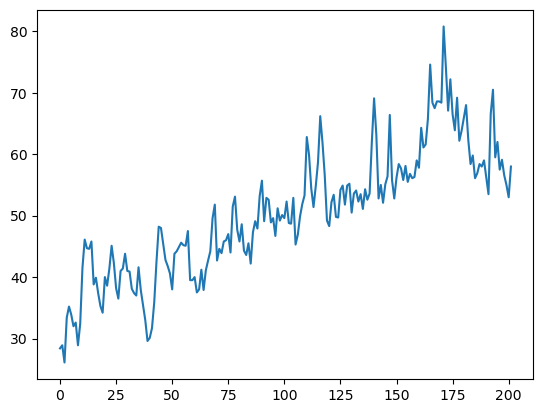

In [36]:
plt.plot(stations_data_jupyter[2025][0]['TEMP'])
plt.show()

In [78]:
for key in stations_data_jupyter.keys():
    for dataset in stations_data_jupyter[key]:
        station_id = dataset['STATION'].iloc[0]
        station_path = os.path.join('data','ncei',str(station_id)+'.csv')
        dataset.to_csv(station_path)